In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('dataset/train_feature_engineered.csv')
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])

df_test = pd.read_csv('dataset/test_feature_engineered.csv')
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'])

## Correlation Matrix

In [3]:
# Create a list of numeric column names
numeric_columns = df_train.select_dtypes(include=['number']).columns

# Create a sub-dataframe with only the numeric columns
numeric_df = df_train[numeric_columns].copy()

correlation_matrix = round(numeric_df.corr(),2)

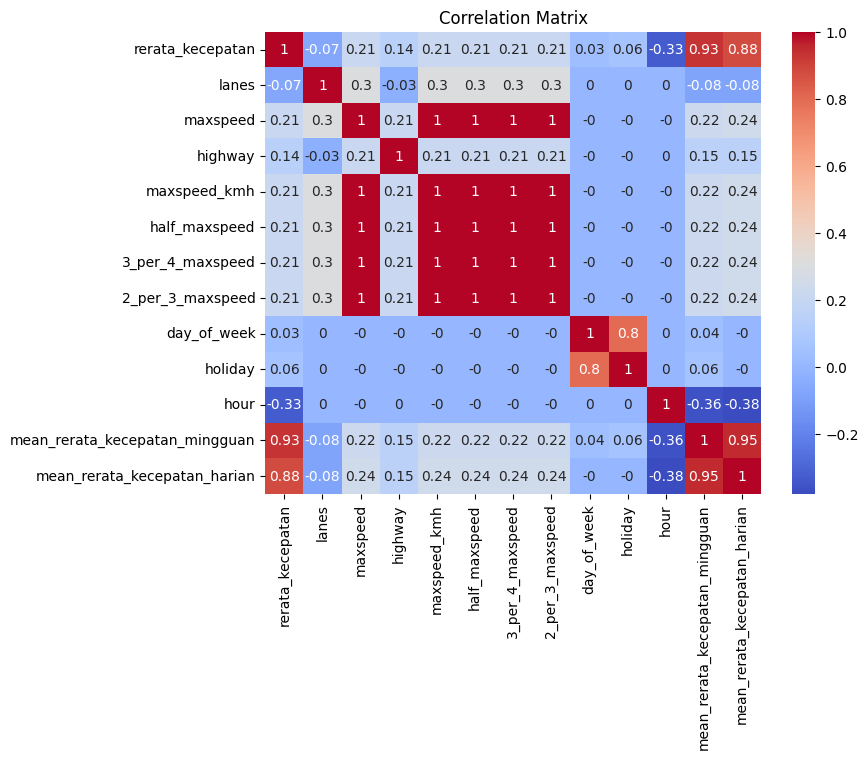

In [4]:
plt.figure(figsize=(8, 6))
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [5]:
df_train.head()

,item_id,timestamp,rerata_kecepatan,lanes,maxspeed,highway,maxspeed_kmh,half_maxspeed,3_per_4_maxspeed,2_per_3_maxspeed,day_of_week,holiday,hour,mean_rerata_kecepatan_mingguan,mean_rerata_kecepatan_harian
0,691007296_21390008_1425033102,2020-02-01 01:00:00,29.126,3.0,30.0,1,48.2802,15.0,22.5,19.98,5,1,1,29.16500,33.901227
1,691007296_21390008_1425033102,2020-02-01 02:00:00,34.772,3.0,30.0,1,48.2802,15.0,22.5,19.98,5,1,2,33.76325,36.706273
2,691007296_21390008_1425033102,2020-02-01 03:00:00,34.161,3.0,30.0,1,48.2802,15.0,22.5,19.98,5,1,3,35.57825,40.137864
3,691007296_21390008_1425033102,2020-02-01 04:00:00,39.383,3.0,30.0,1,48.2802,15.0,22.5,19.98,5,1,4,39.11825,41.621818
4,691007296_21390008_1425033102,2020-02-01 05:00:00,42.153,3.0,30.0,1,48.2802,15.0,22.5,19.98,5,1,5,41.97125,42.447091


### Select Best Feature

In [7]:
df_train = df_train[['item_id','timestamp','rerata_kecepatan','mean_rerata_kecepatan_mingguan','mean_rerata_kecepatan_harian','hour','2_per_3_maxspeed','highway']]
df_test = df_test[['item_id','timestamp','mean_rerata_kecepatan_mingguan','mean_rerata_kecepatan_harian','hour','2_per_3_maxspeed','highway']]

### Save File

In [8]:
df_train.to_csv(r'dataset/train_feature_selected.csv', index=False)
df_test.to_csv(r'dataset/test_feature_selected.csv', index=False)